# Pre-laboratorio 1



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import numpy as np

In [2]:
import time
import math

def timeSince(since):
    now = time.time_ns()
    s = now - since
    return s*10**(-9)

> 1. Programe el método `DiscreteQuantile(f,u)`, que recibe como parámetros una función de masa discreta $f$ y un vector $u\in [0,1]^{r}$, y retorne el menor vector $n\in\mathbb{N}^r$ (coordenada a coordenada) tal que $\sum_{j=0}^{n_i}f(j)\geq u_i.$

In [3]:
def DiscreteQuantile(f,u):
    n = np.zeros(u.shape[0],dtype=int)
    for r in range(u.shape[0]):
        while sum([f(i) for i in range(1,n[r]+1)])<u[r]:
            n[r]+=1
    return n

> 2. Programe el método `DiscreteQuantileF(F,u)`, que recibe como parámetros una función de distribución $F$ y un vector $u\in [0,1]^{r}$, y retorne el menor vector $n\in\mathbb{N}^r$ tal que $\ F(n_i)\geq u_i.$

In [4]:
def DiscreteQuantileF(F,u):
    n = np.zeros(u.shape[0],dtype=int)
    for r in range(u.shape[0]):
        while F(n[r])<u[r]:
            n[r]+=1
    return n

> 3. Programe el método `ContinuousQuantile(F,f,u)`, que recibe como parámetros una función de distribución F, su función de densidad $f$ y un vector $u \in [0, 1]^r$, y aplique el método de Newton para calcular el vector $x \in \mathbb{R}^r$ tal que $|F(x_i) − u_i| \leq error$, donde $error$ es un parámetro de la clase inicializado con $error=10^{−4}$.

In [5]:
def ContinuousQuantile(F,f,u,error=0.00001):
    x = np.zeros(u.shape[0])
    for r in range(u.shape[0]):
        while np.abs(F(x[r])-u[r])>error:
            x[r] = x[r] - (F(x[r])-u[r])/f(x[r])
    return x

Considere $X$ una variable aleatoria discreta con

$$ \mathbb{P}(X=j) = \frac{1}{2}^j, \, j\leq 1$$

> 4. Para $k = 1, \dots , 5$, simule $n = 10^k$ réplicas de X para cada uno de los 3 métodos implementados, usando las mismas $n^k$ variables uniformes para cada uno de ellos (en el caso del método continuo utilice el comando ceil para redondear el resultado) ¿En que medida coinciden los resultados de los tres métodos y por qué?
Grafique el tiempo de ejecución en función de la cantidad de réplicas, estime el costo por réplica de cada uno de los métodos y ordene los métodos según su eficiencia.

Primero notemos que esto corresponde a una **distribución geométrica** de parámetro $p=\frac{1}{2}$, i.e.,
$$ X = \inf \{k\geq1:U_k\leq \frac{1}{2}\}$$

In [6]:
def f(j):
    return 10000000 if j==0 else 0.5**j

def F(j):
    return 0 if j==0 else 1-0.5**j

Definiremos una función para generar las muestras uniformes que necesitamos.

In [7]:
def uniforme(n):
    return np.random.uniform(size=n)

In [8]:
simulaciones = {}
tiempo = {}

for k in range(1,6):
    n = 10**k
    u = uniforme(n)
    
    # Discrete Quantile
    start = time.time_ns()
    dq_method = DiscreteQuantile(f,u)
    dq_time = timeSince(start)
    
    # Discrete Quantile F
    start = time.time_ns()
    dqF_method = DiscreteQuantileF(F,u)
    dqF_time = timeSince(start)
    
    # Continuous Quantile
    start = time.time_ns()
    cq_method = np.ceil(ContinuousQuantile(F,f,u))
    cq_time = timeSince(start)
    
    simulaciones[k] = {'Discrete':dq_method,'DiscreteF':dqF_method,'Continuous':cq_method}
    tiempo[k] = {'Discrete':dq_time,'DiscreteF':dqF_time,'Continuous':cq_time}

**Estudiemos a que punto las distintas simulaciones son diferentes.**

Partiendo primero con la simulación de 10 muestras (k=1)

In [9]:
df1 = pd.DataFrame(simulaciones[1])
df1.describe().drop(["min","max","count","25%","50%","75%"])

,Discrete,DiscreteF,Continuous
mean,2.200000,2.200000,2.200000
std,1.316561,1.316561,1.316561


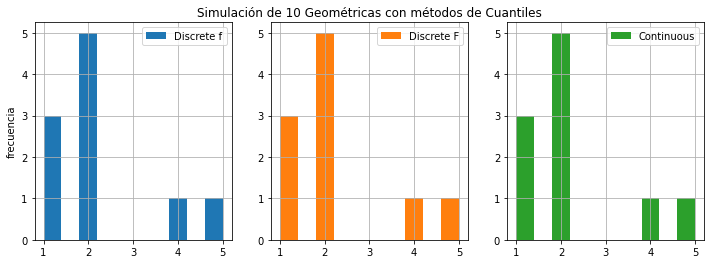

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.hist(df1.Discrete, color='tab:blue', label='Discrete f')
ax2.hist(df1.DiscreteF, color='tab:orange', label='Discrete F')
ax3.hist(df1.Continuous, color='tab:green', label='Continuous')
ax1.legend(), ax2.legend(), ax3.legend()
ax1.grid(), ax2.grid(), ax3.grid()
ax1.set(ylabel='frecuencia')
ax2.set(title='Simulación de 10 Geométricas con métodos de Cuantiles');

In [11]:
def plot_simulaciones(df,n):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
    ax1.hist(df.Discrete, color='tab:blue', label='Discrete f')
    ax2.hist(df.DiscreteF, color='tab:orange', label='Discrete F')
    ax3.hist(df.Continuous, color='tab:green', label='Continuous')
    ax1.legend(), ax2.legend(), ax3.legend()
    ax1.grid(), ax2.grid(), ax3.grid()
    ax1.set(ylabel='frecuencia')
    ax2.set(title='Simulación de {} Geométricas con métodos de Cuantiles'.format(n));

Para $k=2$

,Discrete,DiscreteF,Continuous
mean,2.200000,2.200000,2.200000
std,1.316561,1.316561,1.316561


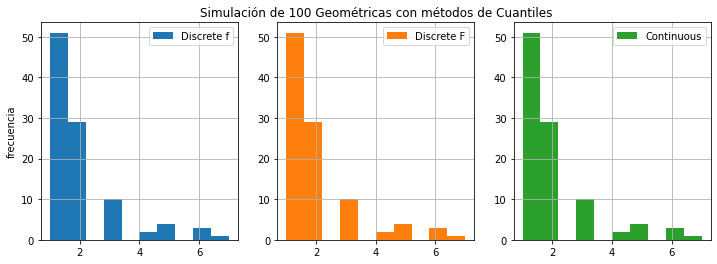

In [12]:
df2 = pd.DataFrame(simulaciones[2])
plot_simulaciones(df2,100)
df1.describe().drop(["min","max","count","25%","50%","75%"])

,Discrete,DiscreteF,Continuous
mean,2.200000,2.200000,2.200000
std,1.316561,1.316561,1.316561


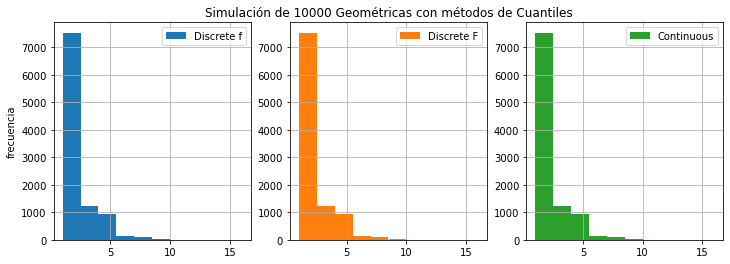

In [13]:
df4 = pd.DataFrame(simulaciones[4])
plot_simulaciones(df4,10000)
df1.describe().drop(["min","max","count","25%","50%","75%"])

,Discrete,DiscreteF,Continuous
mean,2.200000,2.200000,2.200000
std,1.316561,1.316561,1.316561


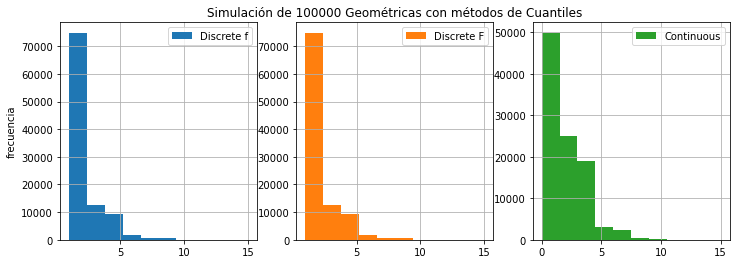

In [14]:
df5 = pd.DataFrame(simulaciones[5])
plot_simulaciones(df5,100000)
df1.describe().drop(["min","max","count","25%","50%","75%"])

A continuación procedemos a graficar el tiempo versus la cantidad de muestras.

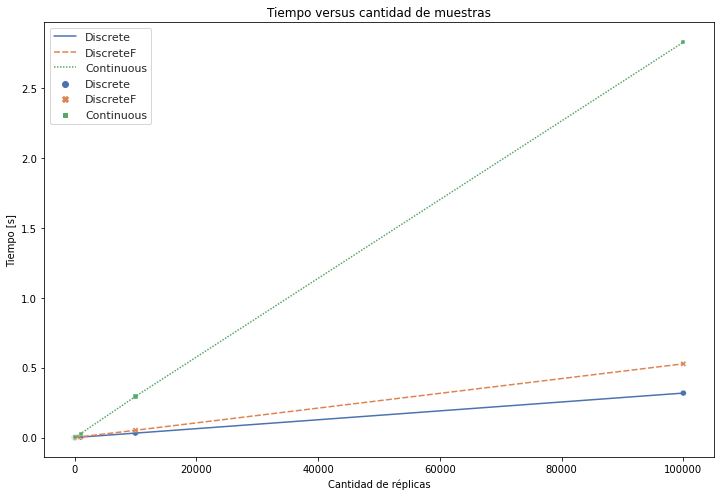

In [15]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
t_values = [[tiempo[k][method] for method in ['Discrete','DiscreteF','Continuous']] for k in range(1,6)]
t_values = np.asarray(t_values)
t_data = pd.DataFrame(t_values, [10**n for n in range(1,6)], columns=['Discrete','DiscreteF','Continuous'])
sns.set_theme(style="whitegrid")
sns.scatterplot(data=t_data,ax=ax)
sns.lineplot(data=t_data, ax=ax)
ax.set(xlabel='Cantidad de réplicas',ylabel='Tiempo [s]',title='Tiempo versus cantidad de muestras')
plt.show()

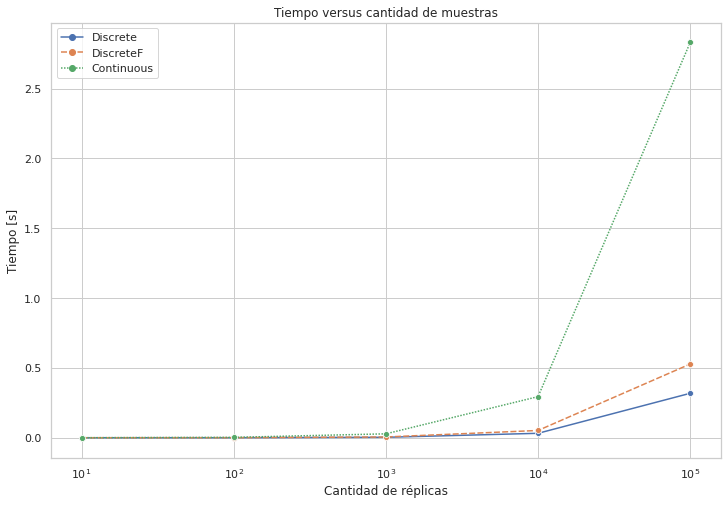

In [16]:
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
plot = sns.lineplot(data=t_data, ax=ax, markers=['o','o','o'])
plot.set(xscale='log')
ax.set(xlabel='Cantidad de réplicas',ylabel='Tiempo [s]',title='Tiempo versus cantidad de muestras')
plt.show()

Luego podemos tomar la media por muestra para cada método:

In [17]:
means = {}
for method in ['Discrete','DiscreteF','Continuous']:
    times = list(t_data[method])
    means[method] = [times[k]/10**(k+1) for k in range(len(times))]
    print('{}: {} [s] promedio'.format(method, np.mean(means[method])))

Discrete: 3.558830406e-06 [s] promedio
DiscreteF: 5.4850328240000005e-06 [s] promedio
Continuous: 2.8363289176000002e-05 [s] promedio


Esto último corresponde al **costo de simulación** por réplica, que vimos que está dado por:
$$ C \approx \frac{T_N}{N}$$
Donde $N$ es un número de réplicas suficientemente grande y $T_N$ es el tiempo que toma simularlas.

Notamos que **Discrete es el método más eficiente**. La diferencia es poca (del orden de $10^{-6}$) con respecto al método DiscreteF. Si bien estos dos métodos realizan lo mismo del punto de vista teórico, sus implementaciones son diferentes, lo que justifica esta diferencia.

Por otro lado **Continuous es el método más costoso**, lo cual puede explicarse debido a la complejidad de las operaciones que ejecuta este. La siguiente tabla resume esto, en orden decreciente de eficiencia:

|            | Costo de simulación por réplica [s] |
|------------|-------------------------------------|
| Discrete   | $0.3882 \cdot 10^{-5}$              |
| DiscreteF  | $0.6316 \cdot 10^{-5}$              |
| Continuous | $2.9595 \cdot 10^{-5}$              |

> 5. Usando el método más efciente, para $k = 1, \dots, 5$ simule $n = 10^k$ réplicas de $X$, calcule las medias y varianzas muestrales, y luego compare los resultados con los valores teóricos.

Primero recordemos que teóricamente, la media y la variaza de una Geométrica están dadas por:

$$ \mathbb{E}(X) = \frac{1}{p} = 2$$
$$ Var(E) = \frac{1-p}{p^2} = 2$$

In [18]:
simulaciones = {}

for k in range(1,6):
    n = 10**k
    u = uniforme(n)
    # Discrete Quantile
    dq_method = DiscreteQuantile(f,u)
    
    simulaciones[k] = pd.DataFrame(dq_method)

In [19]:
dframe = pd.DataFrame(columns=['10e1','10e2','10e3','10e4','10e5','teórica'],dtype=None)
dframe.loc['mean'] = [simulaciones[k].mean()[0] for k in range(1,6)]+[2.]
dframe.loc['variance'] = [simulaciones[k].std()[0]**2 for k in range(1,6)]+[2.]
dframe

,10e1,10e2,10e3,10e4,10e5,teórica
mean,2.600000,1.920000,1.99500,2.017900,2.006500,2.0
variance,3.377778,1.326869,2.13511,2.013181,2.011618,2.0


In [22]:
data = {'n':np.arange(1, 50001, 100), 'var':[], 'mean':[]}

u = uniforme(max(data['n']))

for n in data['n']:
    dq_method = DiscreteQuantile(f,u[:n])
    data['var'].append(dq_method.std()**2)
    data['mean'].append(dq_method.mean())

Data = pd.DataFrame(data)

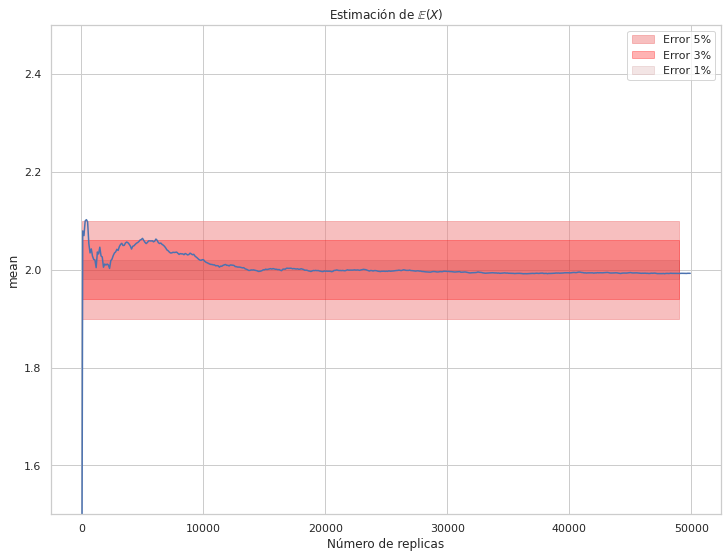

In [23]:
MEAN = 2.0

fig, ax = plt.subplots(figsize=(12,9))
with sns.plotting_context(font_scale=4):
    # sns.scatterplot(data=Data, x='n', y='mean', ax=ax, alpha=0.6);
    sns.lineplot(data=Data, x='n', y='mean', ax=ax, markers=['x'])
    ax.fill_between(np.arange(1, 50001, 1000), MEAN*0.95, MEAN*1.05, color='lightcoral', alpha=0.5, label='Error 5%');
    ax.fill_between(np.arange(1, 50001, 1000), MEAN*0.97, MEAN*1.03, color='red', alpha=0.3, label='Error 3%');
    ax.fill_between(np.arange(1, 50001, 1000), MEAN*0.99, MEAN*1.01, color='darkred', alpha=0.1, label='Error 1%');
    plt.xlabel('Número de replicas')
    plt.legend()
    plt.ylim([1.5,2.5])
    plt.title(r'Estimación de $\mathbb{E}(X)$');

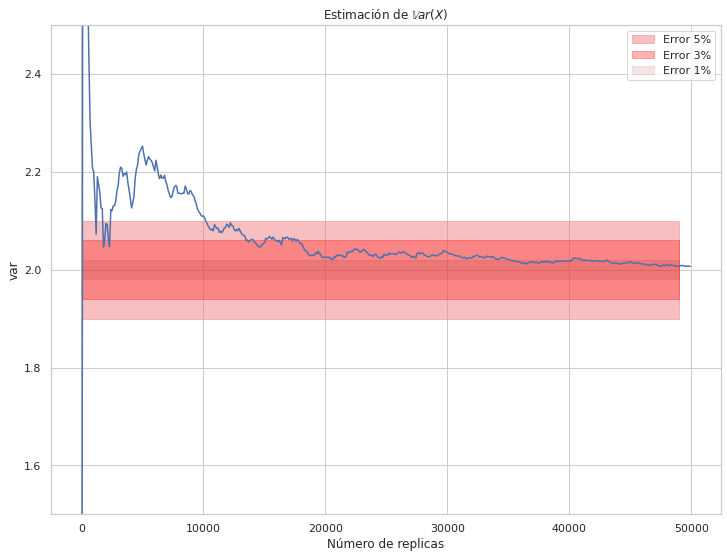

In [24]:
VAR = 2.0

fig, ax = plt.subplots(figsize=(12,9))
with sns.plotting_context(font_scale=4):
    # sns.scatterplot(data=Data, x='n', y='var', ax=ax, alpha=0.6);
    sns.lineplot(data=Data, x='n', y='var', ax=ax, markers=['x'])
    ax.fill_between(np.arange(1, 50001, 1000), VAR*0.95, VAR*1.05, color='lightcoral', alpha=0.5, label='Error 5%');
    ax.fill_between(np.arange(1, 50001, 1000), VAR*0.97, VAR*1.03, color='red', alpha=0.3, label='Error 3%');
    ax.fill_between(np.arange(1, 50001, 1000), VAR*0.99, VAR*1.01, color='darkred', alpha=0.1, label='Error 1%');
    plt.xlabel('Número de replicas')
    plt.legend()
    plt.ylim([1.5,2.5])
    plt.title(r'Estimación de $\mathbb{V}ar(X)$');

Se observa la convergencia hacía la varianza y la media teórica, con una ligera oscilación con respecto a esta del orden del 5% en el caso de la primera.